In [635]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [636]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font_scale=1)

In [637]:
topGames = pd.read_csv('./top100videogamesales.csv')
topGames.head(40)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Nintendo,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Mario Kart Wii,Nintendo,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
2,3,Wii Sports Resort,Nintendo,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
3,4,New Super Mario Bros.,Nintendo,2006,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
4,5,Wii Play,Nintendo,2006,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
5,6,New Super Mario Bros. Wii,Nintendo,2009,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
6,7,Nintendogs,Nintendo,2005,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
7,8,Mario Kart DS,Nintendo,2005,Racing,Nintendo,9.81,7.57,4.13,1.92,23.42
8,9,Wii Fit,Nintendo,2007,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
9,10,Wii Fit Plus,Nintendo,2009,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


# Global Sales
* A line chart shows the total global sales for each year. 
* The result of the chart is explained in markdown.
* The question: “What percentage of global sales does PlayStation have in the dataset?” is answered with an appropriate chart and markdown.
* A stacked column (or bar) chart shows the sales by region for each publisher in the data.
* Chart is explained with markdown and details which publisher had the most sales. 
* Charts are not in the default color and settings.

/Users/johnmunger/tth_data_analysis/project_5/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/johnmunger/tth_data_analysis/project_5/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


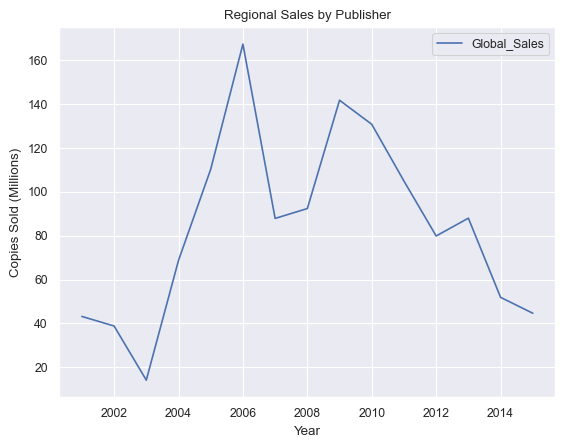

In [638]:
globalSalesByYear=pd.pivot_table(topGames, values='Global_Sales', index=['Year'], aggfunc='sum')
sns.set_theme('paper')
sns.lineplot(data=globalSalesByYear)

plt.xlabel('Year')
plt.ylabel('Copies Sold (Millions)')
 
# title of plot
plt.title('Regional Sales by Publisher')
plt.show()







*The above Line graph is Global_Sales aggregated by Year*
* The x-axis is labelled Year
* The y-axis is labelled Copies Sold in Millions
* The Highest total sales is 2006 with the release of the Wii and the pack-in Wii Spoorts accounting for 80 million units sold.



In [639]:
publishers = pd.Series(topGames['Publisher'].unique())
platforms = pd.Series(topGames['Platform'].unique())
publisherTotalsNA = np.zeros(len(publishers))
publisherTotalsJP = np.zeros(len(publishers))
publisherTotalsEU = np.zeros(len(publishers))
publisherTotalsOther = np.zeros(len(publishers))
for i in range(len(publishers)):
    publisherTotalsNA[i] = topGames[topGames['Publisher'] == publishers.iloc[i]]['NA_Sales'].sum()
    publisherTotalsJP[i] = topGames[topGames['Publisher'] == publishers.iloc[i]]['JP_Sales'].sum()
    publisherTotalsEU[i] = topGames[topGames['Publisher'] == publishers.iloc[i]]['EU_Sales'].sum()
    publisherTotalsOther[i] = topGames[topGames['Publisher'] == publishers.iloc[i]]['Other_Sales'].sum()

platformTotalsNA = np.zeros(len(platforms))
platformTotalsJP = np.zeros(len(platforms))
platformTotalsEU = np.zeros(len(platforms))
platformTotalsOther = np.zeros(len(platforms))
for i in range(len(platforms)):
    platformTotalsNA[i] = topGames[topGames['Platform'] == platforms.iloc[i]]['NA_Sales'].sum()
    platformTotalsJP[i] = topGames[topGames['Platform'] == platforms.iloc[i]]['JP_Sales'].sum()
    platformTotalsEU[i] = topGames[topGames['Platform'] == platforms.iloc[i]]['EU_Sales'].sum()
    platformTotalsOther[i] = topGames[topGames['Platform'] == platforms.iloc[i]]['Other_Sales'].sum()

Text(0.5, 1.0, 'Regional Sales by Publisher')

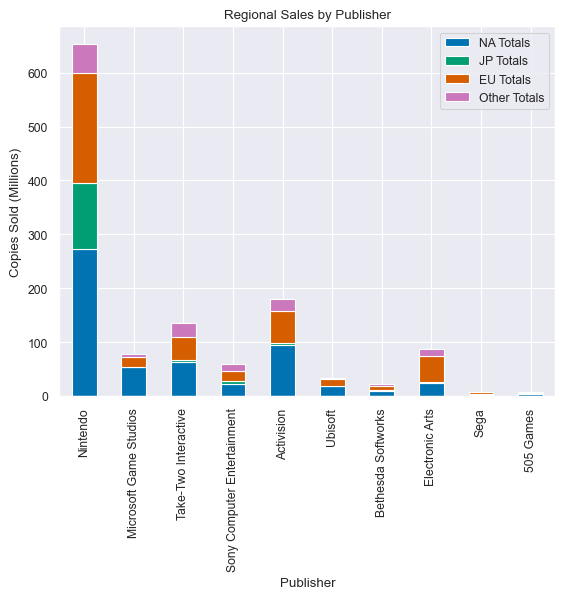

In [640]:
publishersTotalsDict = {'NA Totals':publisherTotalsNA,'JP Totals':publisherTotalsJP,'EU Totals': publisherTotalsEU,'Other Totals':publisherTotalsOther}
publisherTotals = pd.DataFrame(data=publishersTotalsDict, index=publishers)
colorPalette = sns.color_palette('colorblind6')
publisherTotals.plot(kind='bar', stacked=True, color=[*colorPalette])
 
# labels for x & y axis

sns.set_theme('paper')
plt.xlabel('Publisher')
plt.ylabel('Copies Sold (Millions)')
 
# title of plot
plt.title('Regional Sales by Publisher')

*Above we see sales by stacked by region for each platform in the top 100 games*

In [641]:
platformsTotalsDict = {'NA Totals':platformTotalsNA,'JP Totals':platformTotalsJP,'EU Totals': platformTotalsEU,'Other Totals':platformTotalsOther}
publisherTotals = pd.DataFrame(data=platformsTotalsDict, index=platforms)

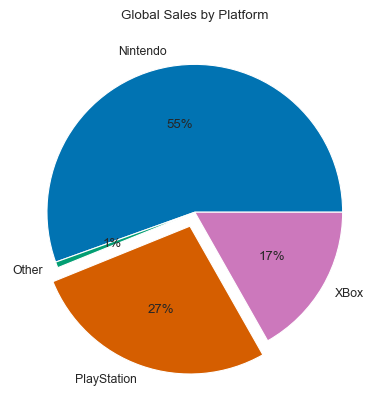

In [642]:
globalSalesByPlatform=pd.pivot_table(topGames, values='Global_Sales', index=['Platform'], aggfunc='sum')
colorPalette = sns.color_palette('colorblind6')
plt.title('Global Sales by Platform')
explode = [0, 0, 0.1, 0]
sns.set_theme('paper')
plt.pie(globalSalesByPlatform.Global_Sales.to_list(), labels=globalSalesByPlatform.index.to_list(), colors=[*colorPalette], 
        explode=explode, autopct='%.0f%%') 
# displaying chart 
plt.show() 

*If we aggregate global sales by platform we see that Playstation has 27% of Share of Global Sales for Top 100 games*

## Games Distribution


1. A histogram shows the global sales distribution for games with Action as the genre
1. The result of the chart is explained in markdown.
1. The question: “What is the distribution of sales for Shooter games?” is answered with an appropriate chart and markdown. 
1. Charts are not in the default color and settings.

/var/folders/b0/0q254ym56zq02g4h54fy942m0000gn/T/ipykernel_2579/3641218307.py:3: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.histplot(data=topGames[topGames.Genre == 'Action'],x='Global_Sales', hue='Platform', palette=colorPalette, bins=10, multiple="dodge", thresh=None)
/Users/johnmunger/tth_data_analysis/project_5/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


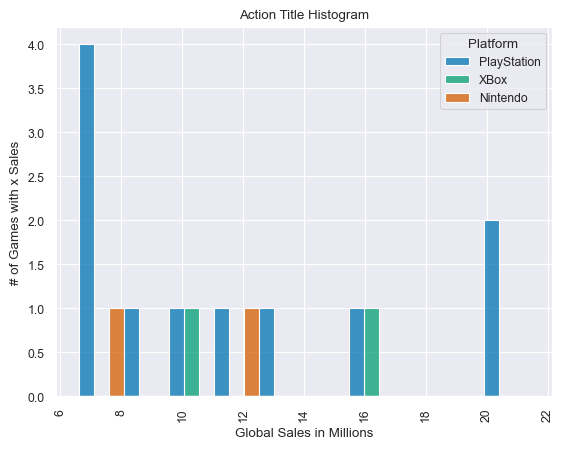

In [643]:
sns.set_theme('paper')
colorPalette = sns.color_palette('colorblind6')
sns.histplot(data=topGames[topGames.Genre == 'Action'],x='Global_Sales', hue='Platform', palette=colorPalette, bins=10, multiple="dodge", thresh=None)
plt.xticks(rotation=90)
# labels for x & y axis
plt.xlabel('Global Sales in Millions')
plt.ylabel('# of Games with x Sales')
plt.title('Action Title Histogram')
plt.show()



*This graph shows the distributions of titles in the action genre that with further breakdown by Platform*

/var/folders/b0/0q254ym56zq02g4h54fy942m0000gn/T/ipykernel_2579/3020247704.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(data=topGames[topGames.Genre == 'Shooter'], x='Global_Sales', palette=palette_color)
/Users/johnmunger/tth_data_analysis/project_5/.conda/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


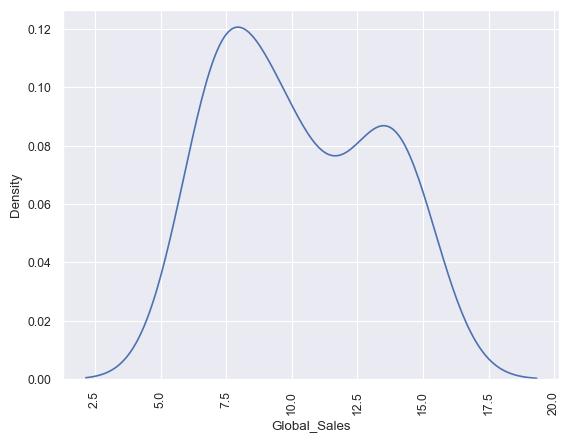

(None,
 count    25.000000
 mean     10.240000
 std       2.902261
 min       6.720000
 25%       7.370000
 50%       9.760000
 75%      13.460000
 max      14.760000
 Name: Global_Sales, dtype: float64)

In [644]:
sns.set_theme('paper')
sns.kdeplot(data=topGames[topGames.Genre == 'Shooter'], x='Global_Sales', palette=palette_color)

plt.xticks(rotation=90)
# labels for x & y axis
plt.show(), topGames[topGames.Genre == 'Shooter'].Global_Sales.describe()

*We have bi-modal distribution of sales for the top 100 games with the two most common modalities being a game selling 8 Million 

## Sales by Genre
* A pie chart shows the percentage of sales each genre had in the North American market. (Group smaller “slices” together into an “other” category to create an easier to read chart) 
* A pie chart shows the percentage of sales each genre had in the European market. (Group smaller “slices” together into an “other” category to create an easier to read chart)
* Detailed what is included in the other category.
* The differences and similarities between the North American and European charts are explained in markdown
* Charts are not in the default color and settings.

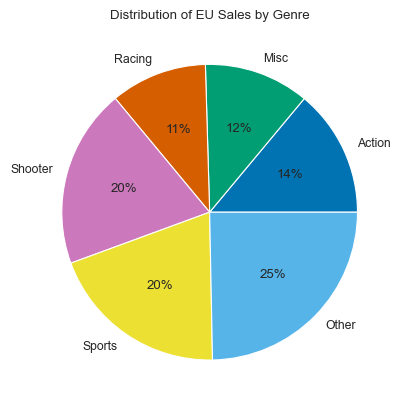

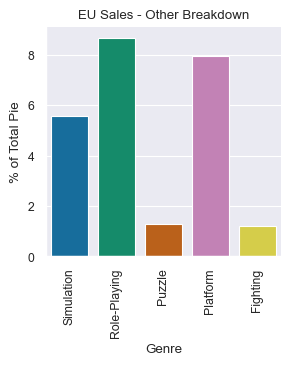

In [645]:
#EU Chart
euSalesByGenre=pd.pivot_table(topGames, values='EU_Sales', index=['Genre'], aggfunc='sum')
euValues=euSalesByGenre.EU_Sales.to_list()
euTotal=np.array(euSalesByGenre.EU_Sales.to_list()).sum()
euLabels=euSalesByGenre.index.to_list()
euOtherValues = []
euOtherLabels = []
marked= []
for i in range(len(euValues)):
    if(euValues[i] <= 40):
        marked.append(i)
for j in range(len(marked)):
    ##remove in reverse order so that the index removed doesn't vanish
    marked.sort(reverse=True)
    euOtherLabels.append(euLabels.pop(marked[j]))   
    euOtherValues.append(euValues.pop(marked[j]))
euOtherSum = np.array(euOtherValues).sum()
euValues.append(euOtherSum)
euLabels.append('Other')
colorPalette = sns.color_palette('colorblind6')
sns.set_theme('paper')
plt.title('Distribution of EU Sales by Genre')
plt.pie(euValues, labels=euLabels, autopct='%.0f%%', colors=[*colorPalette.as_hex()]) 
plt.show()
#Other Category BarChart
euOtherDict={'Genre':np.array(euOtherLabels), 'Percentage':np.array(euOtherValues)*(100/euTotal)}
euOtherFrame = pd.DataFrame(euOtherDict)
# labels for x & y axis
sns.set_theme('paper')
sns.catplot(euOtherFrame, kind='bar', x='Genre', y='Percentage', palette=colorPalette, height=3)
plt.xlabel('Genre')
plt.ylabel(f'% of Total Pie')
 
# title of plot
plt.title('EU Sales - Other Breakdown')
plt.xticks(rotation=90)
plt.show()

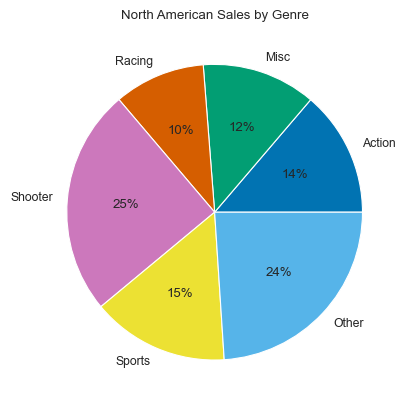

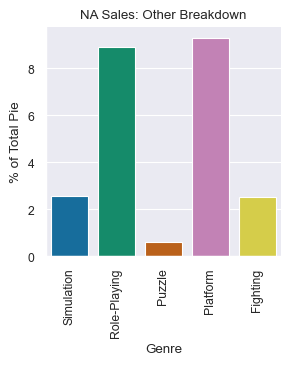

In [646]:
# NA Chart
naSalesByGenre=pd.pivot_table(topGames, values='NA_Sales', index=['Genre'], aggfunc='sum')
naValues=naSalesByGenre.NA_Sales.to_list()
naTotal=np.array(naSalesByGenre.NA_Sales.to_list()).sum()
naLabels=naSalesByGenre.index.to_list()
naOtherValues = []
naOtherLabels = []
marked= []
#this values for naValues remains static even if you remove values from array
#alas, I have to do this procedure in two steps
# 1. add indexes to remove from arrays
# 2. add removed values to their own arrays
for i in range(len(naValues)):
    if(naValues[i] <= 55):
        marked.append(i)
for j in range(len(marked)):
    ##remove in reverse order so that the index removed doesn't vanish
    marked.sort(reverse=True)
    naOtherLabels.append(naLabels.pop(marked[j]))   
    naOtherValues.append(naValues.pop(marked[j]))
naOtherSum = np.array(naOtherValues).sum()
naValues.append(naOtherSum)
naLabels.append('Other')
colorPalette = sns.color_palette('colorblind6')
sns.set_theme('paper')
plt.title('North American Sales by Genre') 
plt.pie(naValues, labels=naLabels, autopct='%.0f%%',colors=[*colorPalette.as_hex()])
plt.title('North American Sales by Genre') 
plt.show()
#Other Category BarChart
naOtherDict={'Genre':np.array(naOtherLabels), 'Percentage':np.array(naOtherValues)*(100/naTotal)}
naOtherFrame = pd.DataFrame(naOtherDict)
# labels for x & y axis
sns.set_theme('paper')
sns.catplot(naOtherFrame, kind='bar', x='Genre', y='Percentage', height=3, palette=colorPalette)
plt.xlabel('Genre')
plt.ylabel(f'% of Total Pie')
 
# title of plot
plt.title('NA Sales: Other Breakdown')
plt.xticks(rotation=90)
plt.show()

## Game Genre Count
* A bar (or column) chart to show the total number of games created for each platform in the dataset. 
* The results are explained in markdown.
* The question: “What genre of game is present the most in the top 100 games from 2000-2015?” is answered with an appropriate chart and markdown
* Charts are not in the default color and settings.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Sports'),
  Text(1, 0, 'Racing'),
  Text(2, 0, 'Platform'),
  Text(3, 0, 'Misc'),
  Text(4, 0, 'Simulation'),
  Text(5, 0, 'Action'),
  Text(6, 0, 'Role-Playing'),
  Text(7, 0, 'Puzzle'),
  Text(8, 0, 'Shooter'),
  Text(9, 0, 'Fighting')])

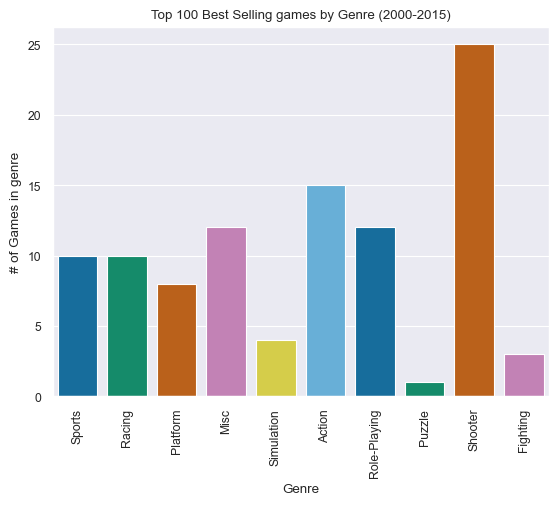

In [647]:

 
# title of plot
plt.title('Top 100 Best Selling games by Genre (2000-2015)')
sns.set_theme('paper')
colorPalette = sns.color_palette('colorblind6')
sns.countplot(topGames, x='Genre', palette=colorPalette)
plt.xlabel('Genre')
plt.ylabel(f'# of Games in genre')
plt.xticks(rotation=90)

*From 2000-2015 means the entire data set. By doing a countplot we count all the instances of each genre and see that shooter is the clear winner with 25 of the top 100 titles belonging to the genre.  Twenty-Five percent of the top 100 games are shooters.*